# **Project: Regression to predict demand of bicycles**
+ build and train a regression model on the Capital Bike Share (Washington, D.C.) Kaggle data set, in order to predict demand for bicycle rentals at any given hour, based on time and weather,

### **Imports**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# sklearn environment
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error,mean_squared_log_error, mean_absolute_error, r2_score

plt.rcParams['figure.figsize'] = (8,5)
sns.set()
sns.set_style('ticks')

In [2]:
df_train = pd.read_csv('Data/train.csv')

### **Explore Data**

In [3]:
df_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [4]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
#transform datetime 
df_train['datetime'] =  pd.to_datetime(df_train['datetime'])

### create features extracted from the datetime

In [7]:
#df_train[‘datetime_minute’] = df_train[‘datetime’].dt.minute

#divide per months
df_train['datetime_month'] = df_train['datetime'].dt.month
# divide by (night 0h-6h, morning 6h-12h, midday 12h-18h, evening 18h-24h )
df_train['datetime_quarters'] = df_train['datetime'].dt.quarter
# divide by day of the week
df_train['datetime_dayofweek'] = df_train['datetime'].dt.dayofweek

### **Questions for data exploration:** 

- Which factors contribute most to the number of bicycles being checked out over the course of a given day?

- How much of an impact does weather have on demand?

- How does the behavior of casual users differ from subscribers?

In [8]:
df_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_month,datetime_quarters,datetime_dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,5


In [9]:
df_train.groupby('season').sum()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_month,datetime_quarters,datetime_dayofweek
season,,,,,,,,,,,,,
1,71,1828,3826,33656.90,40904.975,151216,39314.9233,41605,270893,312498,5389,2686,8197
2,48,1893,3889,62376.58,72826.520,166311,36637.5229,129672,458610,588282,13668,5466,8230
3,96,1845,3735,78680.64,88933.960,175250,31453.7195,142718,497944,640662,21861,8199,8204
4,96,1846,3991,45519.02,54843.790,180919,31928.0527,78140,465894,544034,30075,10936,8179


<AxesSubplot:xlabel='season'>

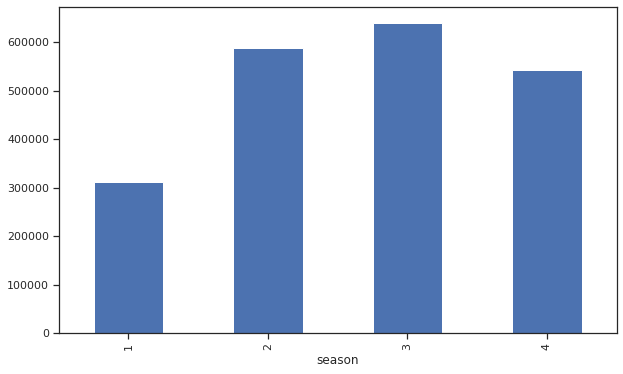

In [100]:
plt.figure(figsize=(10,6))

df_train.groupby('season').sum()['count'].plot(kind='bar')
# There are more rentals during the warmer seasons (summer and autumn)

<AxesSubplot:xlabel='datetime', ylabel='count'>

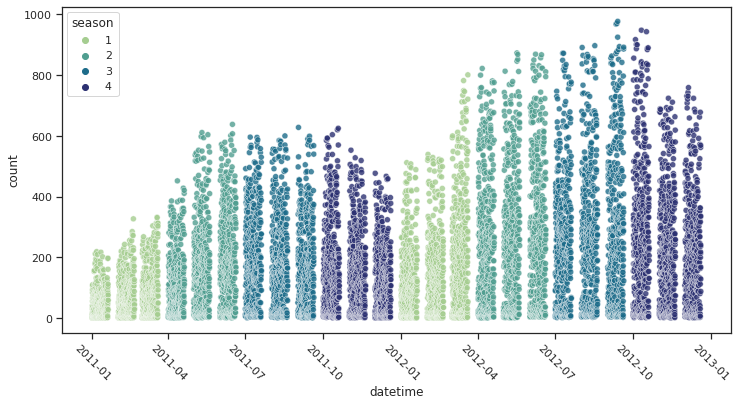

In [11]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=-45)
sns.scatterplot(x=df_train["datetime"],palette= 'crest', y= df_train["count"], hue= df_train['season'], alpha= 0.8)

### Casual/registered

<Figure size 864x432 with 0 Axes>

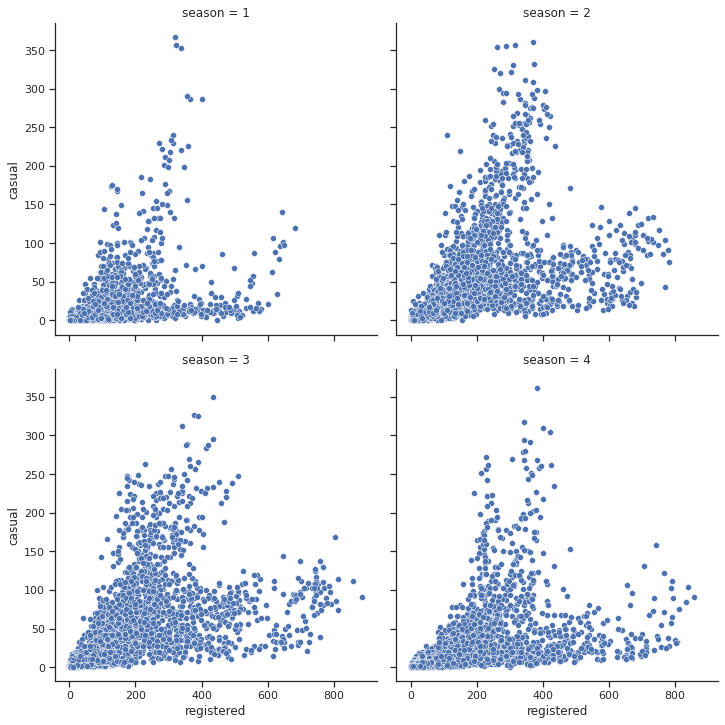

In [12]:
plt.figure(figsize=(12,6))
sns.relplot(y=df_train["casual"], x= df_train["registered"], markers = 'o', data= df_train, col = 'season',  col_wrap =2, height =5)

### Datetime count

In [98]:
#df_train['datetime'].isin(pd.date_range(start='2011-01-06', periods =20))

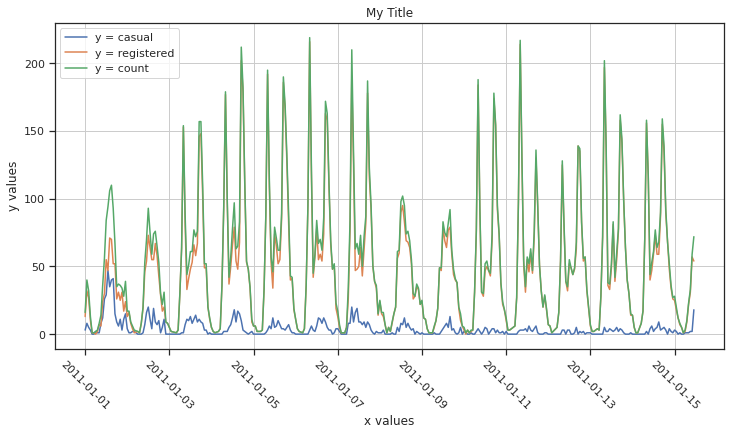

In [15]:
#dataset of two weeks 
plt.figure(figsize=(12,6))
x_vals = df_train['datetime'].head(336)
y_vals = df_train['casual'].head(336)
y_vals2 = df_train['registered'].head(336)
y_vals3 = df_train['count'].head(336)
plt.plot(x_vals, y_vals)
plt.plot(x_vals, y_vals2)
plt.plot(x_vals, y_vals3)
plt.title('My Title')
plt.ylabel('y values')
plt.xlabel('x values')
plt.xticks(rotation=-45)
plt.legend(['y = casual', 'y = registered', 'y = count'])
plt.grid()
plt.show()

### weather

In [16]:
df_train.groupby('weather').sum()

,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,datetime_month,datetime_quarters,datetime_dayofweek
weather,,,,,,,,,,,,,
1,17959,204,4839,147846.82,172565.755,407907,92723.1626,289900,1186163,1476063,46599,17959,22176
2,7171,92,1937,55587.80,65387.220,195831,34517.8506,87246,419914,507160,18795,7171,8199
3,2156,15,635,16790.32,19544.905,69872,12087.2020,14983,87106,102089,5598,2156,2435
4,1,0,1,8.20,11.365,86,6.0032,6,158,164,1,1,0


<AxesSubplot:xlabel='weather'>

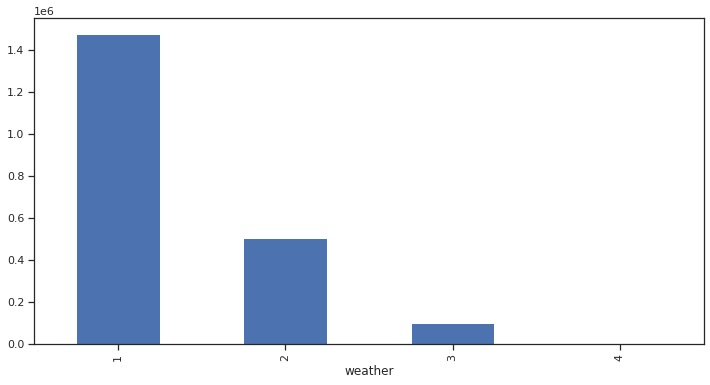

In [101]:
plt.figure(figsize=(12,6))
df_train.groupby('weather').sum()['count'].plot(kind='bar')
#weather has a huge impact on the amount of rented bikes

### Working days

<ipython-input-92-3513f3742df5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby('workingday')['casual','registered','count'].mean().plot(kind= 'bar')


<AxesSubplot:xlabel='workingday'>

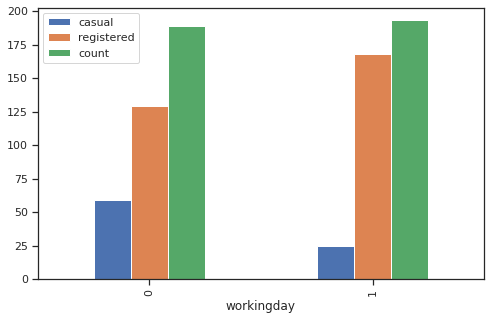

In [92]:
df_train.groupby('workingday')['casual','registered','count'].mean().plot(kind= 'bar')

In [91]:
# interesting. on working days there are more rentals (mean) but way more registered than casual. people use the bike for work

### Holidays

<ipython-input-97-3c25a5914236>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby('holiday')['casual','registered','count'].mean().plot(kind='bar')


<AxesSubplot:xlabel='holiday'>

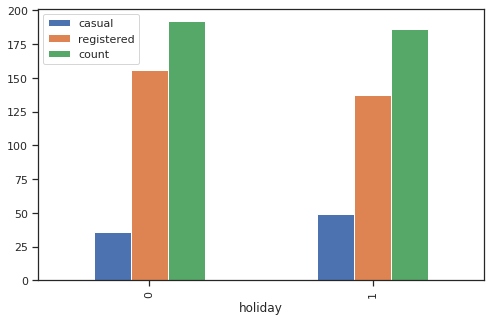

In [97]:
df_train.groupby('holiday')['casual','registered','count'].mean().plot(kind='bar')

In [21]:
# interesting. on holidays there are less rentals (mean) but way more casual than registered users. people who usually dont use the bike use it for a bike trip

### Temp

<AxesSubplot:xlabel='temp', ylabel='count'>

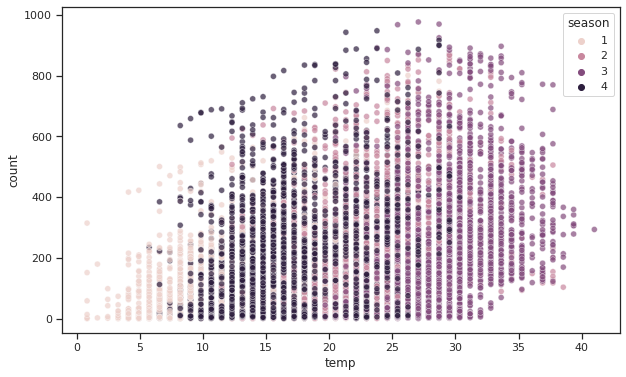

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_train["temp"], y= df_train["count"], hue= df_train['season'], alpha= 0.7)

### Dependency between temp and a temp

/home/marcel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'kde'
  cset = contour_func(


<AxesSubplot:xlabel='temp', ylabel='atemp'>

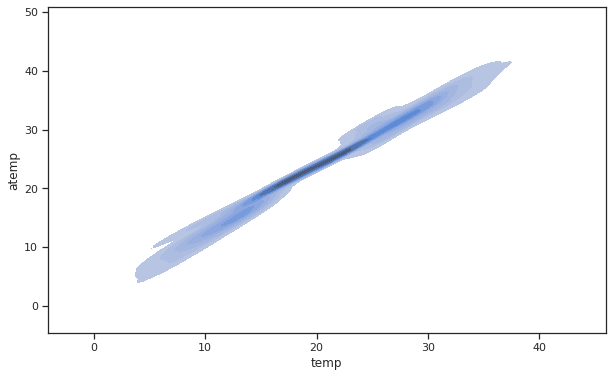

In [23]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=df_train["temp"], y= df_train["atemp"],kde=True, fill=True, palette= 'crest')

### humidity

<AxesSubplot:xlabel='humidity', ylabel='count'>

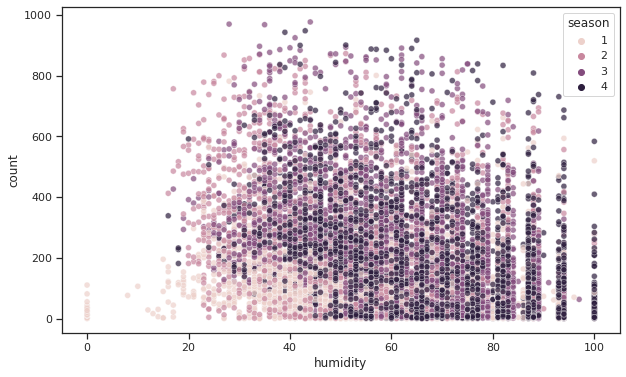

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_train["humidity"], y= df_train["count"], hue= df_train['season'], alpha= 0.7)

# **Linear regression**

In [383]:
df_train.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_month,datetime_quarters,datetime_dayofweek
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,4,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,4,2
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,12,4,2


### Define Input and Target Variables

In [471]:
# input independant variables (features)
X = df_train[['datetime_quarters','datetime_month','datetime_dayofweek','season','holiday','workingday' ,'weather', 'atemp' ,'humidity', 'windspeed']]
# target variable
y = df_train['count']

### Train-Test Split

In [472]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.20,random_state=141)

In [473]:
#Check Shape
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((8708, 10), (8708,), (2178, 10), (2178,))

## **Feature Engineering Data**

In [474]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 1181 to 1654
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime_quarters   8708 non-null   int64  
 1   datetime_month      8708 non-null   int64  
 2   datetime_dayofweek  8708 non-null   int64  
 3   season              8708 non-null   int64  
 4   holiday             8708 non-null   int64  
 5   workingday          8708 non-null   int64  
 6   weather             8708 non-null   int64  
 7   atemp               8708 non-null   float64
 8   humidity            8708 non-null   int64  
 9   windspeed           8708 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 748.3 KB


In [475]:
Xtrain.head(3)

,datetime_quarters,datetime_month,datetime_dayofweek,season,holiday,workingday,weather,atemp,humidity,windspeed
1181,1,3,6,1,0,0,1,13.635,56,22.0028
9193,3,9,3,3,0,1,3,29.545,94,8.9981
2517,2,6,6,2,0,0,1,33.335,74,7.0015


In [476]:
Xtest.head(3)

,datetime_quarters,datetime_month,datetime_dayofweek,season,holiday,workingday,weather,atemp,humidity,windspeed
3960,3,9,4,3,0,1,1,21.210,67,12.9980
455,1,2,2,1,0,1,3,11.365,93,12.9980
2787,3,7,1,3,0,1,1,32.575,65,7.0015


### One Hot Encoding

In [477]:
#One Hot Coding of 'daytime quarters'
Xtrain[['day_quarter_1','day_quarter_2','day_quarter_3','day_quarter_4']] = pd.get_dummies(Xtrain['datetime_quarters'])
Xtest[['day_quarter_1','day_quarter_2','day_quarter_3','day_quarter_4']] = pd.get_dummies(Xtest['datetime_quarters'])

/home/marcel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [478]:
Xtrain = Xtrain.drop('datetime_quarters',axis=1)
Xtrain = Xtrain.drop('day_quarter_4',axis=1)
Xtest = Xtest.drop('datetime_quarters',axis=1)
Xtest = Xtest.drop('day_quarter_4',axis=1)

In [479]:
#One Hot Coding of 'season'
Xtrain[['season_1','season_2','season_3','season_4']] = pd.get_dummies(Xtrain['season'])
Xtest[['season_1','season_2','season_3','season_4']] = pd.get_dummies(Xtest['season'])

In [480]:
Xtrain = Xtrain.drop('season',axis=1)
Xtrain = Xtrain.drop('season_4',axis=1)
Xtest = Xtest.drop('season',axis=1)
Xtest = Xtest.drop('season_4',axis=1)

In [481]:
Xtrain['weather'].unique() , Xtest['weather'].unique()

(array([1, 3, 2]), array([1, 3, 2, 4]))

In [482]:
#One Hot Coding of 'weather'
Xtrain[['weather_1','weather_2','weather_3']] = pd.get_dummies(Xtrain['weather'])
Xtest[['weather_1','weather_2','weather_3', 'weather_4']] = pd.get_dummies(Xtest['weather'])

In [483]:
Xtrain = Xtrain.drop('weather',axis=1)
Xtest = Xtest.drop('weather',axis=1)
Xtest = Xtest.drop('weather_4',axis=1)

In [485]:
Xtrain.head(3)

,datetime_month,datetime_dayofweek,holiday,workingday,atemp,humidity,windspeed,day_quarter_1,day_quarter_2,day_quarter_3,season_1,season_2,season_3,weather_1,weather_2,weather_3
1181,3,6,0,0,13.635,56,22.0028,1,0,0,1,0,0,1,0,0
9193,9,3,0,1,29.545,94,8.9981,0,0,1,0,0,1,0,0,1
2517,6,6,0,0,33.335,74,7.0015,0,1,0,0,1,0,1,0,0


### Scaling

In [486]:
scaler = StandardScaler()

In [487]:
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [488]:
Xtrain

array([[-1.02386147,  1.47322535, -0.17050261, ...,  0.71613976,
        -0.59131973, -0.29473665],
       [ 0.72261956, -0.01653772, -0.17050261, ..., -1.39637549,
        -0.59131973,  3.3928593 ],
       [-0.15062095,  1.47322535, -0.17050261, ...,  0.71613976,
        -0.59131973, -0.29473665],
       ...,
       [ 1.3047799 ,  0.48004997, -0.17050261, ...,  0.71613976,
        -0.59131973, -0.29473665],
       [-1.31494164,  1.47322535, -0.17050261, ...,  0.71613976,
        -0.59131973, -0.29473665],
       [-0.73278129, -0.01653772, -0.17050261, ...,  0.71613976,
        -0.59131973, -0.29473665]])

# **Building Model**

In [489]:
DEGREE = 2
poly = PolynomialFeatures(degree=DEGREE)

In [490]:
Xtrain_poly = poly.fit_transform(Xtrain)
Xtest_poly = poly.transform(Xtest) 

In [491]:
m_lin =LinearRegression()
m_poly = LinearRegression()
m_ridge = Ridge(alpha=1, random_state=31)
m_lasso = Lasso(alpha=1, random_state=31, max_iter=100000)
m_elastic_net = ElasticNet(alpha=1, l1_ratio=.5,random_state=31, max_iter=100000)

In [492]:
m_lin.fit(Xtrain,ytrain)
m_poly.fit(Xtrain_poly, ytrain)
m_ridge.fit(Xtrain_poly, ytrain)
m_lasso.fit(Xtrain_poly, ytrain)
m_elastic_net.fit(Xtrain_poly, ytrain)

ElasticNet(alpha=1, max_iter=100000, random_state=31)

### Scores for linear, poly, ridge, lasso, elastic net

In [493]:
#Score Linear
m_lin.score(Xtrain,ytrain) , m_lin.score(Xtest, ytest), 

(0.2800907462675978, 0.2572619368782545)

In [494]:
#Score Poly
m_poly.score(Xtrain_poly,ytrain) , m_poly.score(Xtest_poly, ytest)

(0.3410951067255452, -1.0854506740687908e+20)

In [495]:
#Score Ridge
m_ridge.score(Xtrain_poly,ytrain) , m_ridge.score(Xtest_poly, ytest)

(0.3412144327882548, 0.29693435812110813)

In [496]:
#Score Lasso
m_lasso.score(Xtrain_poly,ytrain) , m_lasso.score(Xtest_poly, ytest)

(0.33074750400523056, 0.2966298768420744)

In [497]:
#Score Elastic Net 
m_elastic_net.score(Xtrain_poly,ytrain) , m_elastic_net.score(Xtest_poly, ytest)

(0.2850101584466058, 0.257006121524492)

### Predictions

In [451]:
#linear
ypred_train = m_lin.predict(Xtrain)
ypred_test = m_lin.predict(Xtest)
#Poly
ypred_poly_train = m_poly.predict(Xtrain_poly)
ypred_poly_test = m_poly.predict(Xtest_poly)

#Ridge
ypred_ridge_train = m_ridge.predict(Xtrain_poly)
ypred_ridge_test = m_ridge.predict(Xtest_poly)
#Lasso
ypred_lasso_train = m_lasso.predict(Xtrain_poly)
ypred_lasso_test = m_lasso.predict(Xtest_poly)
#Elastic Net
ypred_elastic_train = m_elastic_net.predict(Xtrain_poly)
ypred_elastic_test = m_elastic_net.predict(Xtest_poly)

## RMSLE

In [455]:
print(f'\n With DEGREE of {DEGREE}, I get {len(poly.get_feature_names())} features!')


 With DEGREE of 3, I get 816 features!


### RMSLE of >linear<

In [498]:
print(f'\n The training RMSLE of >linear< {np.sqrt(mean_squared_log_error(ytrain, np.exp(ypred_train)))}')
print(f'\n The test RMSLE of >linear< {np.sqrt(mean_squared_log_error(ytest, np.exp(ypred_test)))}')


 The training RMSLE of >linear< 210.77907964863306

 The test RMSLE of >linear< 207.17559059699903


### RMSLE of >poly<

In [457]:
print(f'\n The training RMSLE of >poly< {np.sqrt(mean_squared_log_error(ytrain, np.exp(ypred_poly_train)))}')
print(f'\n The test RMSLE of >poly< {np.sqrt(mean_squared_log_error(ytest, np.exp(ypred_poly_test)))}')


 The training RMSLE of >poly< 220.0065609018615

 The test RMSLE of >poly< 214.20460443173792


### RMSLE of >ridge<

In [458]:
print(f'\n The training RMSLE of >ridge< {np.sqrt(mean_squared_log_error(ytrain, np.exp(ypred_ridge_train)))}')
print(f'\n The test RMSLE of >ridge< {np.sqrt(mean_squared_log_error(ytest, np.exp(ypred_ridge_test)))}')


 The training RMSLE of >ridge< 219.8170763682639

 The test RMSLE of >ridge< 214.19741777101007


### RMSLE of >lasso<

In [459]:
print(f'\n The training RMSLE of >lasso< {np.sqrt(mean_squared_log_error(ytrain, np.exp(ypred_lasso_train)))}')
print(f'\n The test RMSLE of >lasso< {np.sqrt(mean_squared_log_error(ytest, np.exp(ypred_lasso_test)))}')


 The training RMSLE of >lasso< 214.71614367916175

 The test RMSLE of >lasso< 208.50114120829397


### RMSLE of >elastic net<

In [460]:
print(f'\n The training RMSLE of >elastic net< {np.sqrt(mean_squared_log_error(ytrain, np.exp(ypred_elastic_train)))}')
print(f'\n The test RMSLE of >elastic net< {np.sqrt(mean_squared_log_error(ytest, np.exp(ypred_elastic_test)))}')


 The training RMSLE of >elastic net< 211.67851104066665

 The test RMSLE of >elastic net< 206.0922756836018


## MSE, MAE, R2-score

### linear

In [461]:
# The mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, ypred_test))
# The mean absolute error 
print('Mean absolute error: %.2f'
      % mean_absolute_error(ytest, ypred_test))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination: %.2f'
      % r2_score(ytest, ypred_test))

Mean squared error: 24100.57
Mean absolute error: 116.51
Coefficient of determination: 0.26


In [470]:
m_poly_r2 = m_poly.score(Xtest_poly, ytest)
m_poly_r2

-1.9391017833531747e+17

### poly

In [462]:
# The mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, ypred_poly_test))
# The mean absolute error 
print('Mean absolute error: %.2f'
      % mean_absolute_error(ytest, ypred_poly_test))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination: %.2f'
      % r2_score(ytest, ypred_poly_test))

Mean squared error: 22311.95
Mean absolute error: 109.63
Coefficient of determination: 0.31


### ridge

In [463]:
# The mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, ypred_ridge_test))
# The mean absolute error 
print('Mean absolute error: %.2f'
      % mean_absolute_error(ytest, ypred_ridge_test))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination: %.2f'
      % r2_score(ytest, ypred_ridge_test))

Mean squared error: 22211.42
Mean absolute error: 109.37
Coefficient of determination: 0.32


### lasso

In [464]:
# The mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, ypred_lasso_test))
# The mean absolute error 
print('Mean absolute error: %.2f'
      % mean_absolute_error(ytest, ypred_lasso_test))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination: %.2f'
      % r2_score(ytest, ypred_lasso_test))

Mean squared error: 22233.25
Mean absolute error: 109.61
Coefficient of determination: 0.31


### elastic net

In [465]:
# The mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, ypred_elastic_test))
# The mean absolute error 
print('Mean absolute error: %.2f'
      % mean_absolute_error(ytest, ypred_elastic_test))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination: %.2f'
      % r2_score(ytest, ypred_elastic_test))

Mean squared error: 22508.53
Mean absolute error: 111.03
Coefficient of determination: 0.31
